# Check for Understanding — Autograded (PyTorch)
Run each cell. **Do not delete the asserts.**

**Passing condition:** all asserts pass.

Tip: If an assert fails, read its message, fix your code, and rerun the cell.


In [2]:
# Setup
import torch
import torch.nn as nn

torch.manual_seed(42)

def _is_close(a, b, tol=1e-5):
    return torch.allclose(a, b, atol=tol, rtol=0)

print("PyTorch version:", torch.__version__)


PyTorch version: 2.9.1+cpu


## Part 1 — Tensors & Representations

In [3]:
# Exercise 1: Tensor basics
# TODO:
# 1) Create a 2x3 tensor of random values called X
# 2) Print X, X.shape, X.dtype (datatype)
# 3) Compute the mean of all elements and store it in x_mean (a 0-d tensor)

X = torch.rand(2,3)  # YOUR CODE HERE
x_mean = torch.mean(X)  # YOUR CODE HERE

# Print statements (uncomment after implementing)
print("X=\n", X)
print("shape:", X.shape)
print("dtype:", X.dtype)
print("mean:", x_mean)

# --- autograder asserts (do not delete) ---
assert isinstance(X, torch.Tensor), "X must be a torch.Tensor"
assert X.shape == (2, 3), f"X must have shape (2,3), got {tuple(X.shape)}"
assert X.dtype in (torch.float32, torch.float64), f"X should be float32/float64, got {X.dtype}"
assert isinstance(x_mean, torch.Tensor) and x_mean.shape == (), "x_mean must be a scalar (0-d) tensor"
assert _is_close(x_mean, X.sum() / X.numel()), "x_mean should equal X.sum()/X.numel()"


X=
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
shape: torch.Size([2, 3])
dtype: torch.float32
mean: tensor(0.6885)


In [4]:
# Exercise 2: Manual vector operations
# TODO:
# 1) Create v1 and v2 as 1-D tensors of length 5
# 2) Compute element-wise sum: v_sum
# 3) Compute dot product: v_dot (scalar tensor) 
#    Multiplies corresponding elements of two vectors, then sums the results into a single number.
#    (1×4) + (2×5) + (3×6) = 4 + 10 + 18 = 32
# Why dot products matter:
# - Measures similarity — higher dot product = vectors point in similar directions
# - Core of neural networks — every neuron computes a dot product between inputs and weights
# - Attention mechanisms — transformers use dot products to measure how "related" tokens are

v1 = torch.rand(5)  # YOUR CODE HERE
v2 = torch.tensor([1.,2.,3.,4.,5.])  # YOUR CODE HERE

v_sum = v1 + v2  # YOUR CODE HERE
v_dot = torch.dot(v1, v2)  # YOUR CODE HERE

# Print statements (uncomment after implementing)
print("v1:", v1)
print("v2:", v2)
print("v_sum:", v_sum)
print("v_dot:", v_dot)

# --- autograder asserts (do not delete) ---
assert v1.shape == (5,) and v2.shape == (5,), "v1 and v2 must both be shape (5,)"
assert v_sum.shape == (5,), "v_sum must be a length-5 vector"
assert v_dot.shape == (), "v_dot must be a scalar (0-d) tensor"
manual_dot = (v1 * v2).sum()
assert _is_close(v_dot, manual_dot), "v_dot must equal (v1*v2).sum()"


v1: tensor([0.2566, 0.7936, 0.9408, 0.1332, 0.9346])
v2: tensor([1., 2., 3., 4., 5.])
v_sum: tensor([1.2566, 2.7936, 3.9408, 4.1332, 5.9346])
v_dot: tensor(9.8719)


## Part 2 — Embeddings

In [5]:
# Exercise 3: Simple embedding lookup
# TODO:
# 1) Create an nn.Embedding called emb with vocab_size=10 and emb_dim=4
# 2) Create token_ids as a LongTensor of shape (3,) with values in [0, 9]
# 3) Lookup embeddings: E = emb(token_ids)
# 4) Print E and E.shape

# vocab size == dictionary size == number of embeddings
# embedding dim == size of each embedding vector

vocab_size, emb_dim = 10, 4
emb = nn.Embedding(vocab_size, emb_dim)  # YOUR CODE HERE

#token_ids = torch.tensor([0,5,9], dtype=torch.long)  # YOUR CODE HERE
token_ids = torch.LongTensor([0,5,9]) # different syntax
E = emb(token_ids)  # YOUR CODE HERE

# Print statements (uncomment after implementing)
print("token_ids:", token_ids)
print("E=\n", E)
print("E.shape:", E.shape)

# --- autograder asserts (do not delete) ---
assert isinstance(emb, nn.Embedding), "emb must be an nn.Embedding"
assert token_ids.dtype == torch.long, "token_ids must be torch.long"
assert token_ids.shape == (3,), f"token_ids must be shape (3,), got {tuple(token_ids.shape)}"
assert E.shape == (3, 4), f"E must have shape (3,4), got {tuple(E.shape)}"
assert E.requires_grad, "Embedding output should require gradients by default"


token_ids: tensor([0, 5, 9])
E=
 tensor([[-0.9342, -0.2483, -1.2082, -0.4777],
        [-0.2168, -1.3847, -0.8712, -0.2234],
        [ 1.3835, -1.2024,  0.7078, -1.0759]], grad_fn=<EmbeddingBackward0>)
E.shape: torch.Size([3, 4])


In [6]:
# Exercise 4: From embeddings to a prediction
# NOTE: This exercise depends on Exercise 3 — complete that first.
# TODO:
# 1) Compute mean embedding across tokens: mean_E of shape (4,)
# 2) Create a Linear layer (4 -> 1) called head
# 3) Produce y_pred as shape (1,) or scalar

# Was this covered in any of the docs? I didn't even see the mean method on the pytorch Embedding docs: 
# https://docs.pytorch.org/docs/stable/generated/torch.nn.Embedding.html

# E has shape (3, 4) — 3 tokens, each with a 4-dimensional embedding
# Compute the mean across tokens → single vector of shape (4,)
mean_E = E.mean(dim=0)  # mean_E = [avg of column 0, avg of column 1, avg of column 2, avg of column 3]

# Linear layer / fully connected layer / dense layer
# It's common to call the final layer that produces the output a "head" — it sits on top of the model and makes the final prediction.
head = nn.Linear(4, 1)  # takes input of vector of 4 values, outputs a single value (based on input, weight, and bias)

y_pred = head(mean_E)  # single number (1,) -> model's prediction

# Print statements (uncomment after implementing)
print("mean_E.shape:", mean_E.shape)
print("y_pred:", y_pred, "shape:", y_pred.shape)

# --- autograder asserts (do not delete) ---
assert mean_E.shape == (4,), f"mean_E must be shape (4,), got {tuple(mean_E.shape)}"
assert isinstance(head, nn.Linear) and head.in_features == 4 and head.out_features == 1, "head must be Linear(4->1)"
assert y_pred.numel() == 1, "y_pred must have exactly 1 element"
assert y_pred.requires_grad, "y_pred should require gradients"


mean_E.shape: torch.Size([4])
y_pred: tensor([0.2955], grad_fn=<ViewBackward0>) shape: torch.Size([1])


## Part 3 — Build a Tiny Network

In [7]:
# Exercise 5: Define a simple feed-forward network
# Requirements:
# - input_dim = 6
# - hidden_dim = 8
# - output_dim = 1
# - 1 hidden layer + ReLU (Rectified Linear Unit)
# Implement SimpleNet so forward(x) returns shape (batch, 1)

# Why "hidden"? B/C 6 goes in and 1 comes out. The 8 values are internal, hidden to outside world.
# Why have hidden layers?
# More neurons = more capacity to learn complex patterns. Think of it as "working memory" for intermediate computations.

class SimpleNet(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 6 → 8
        # Why use activation? Without activations, stacking linear layers is pointless (they collapse into a single linear layer). 
        # ReLU adds non-linearity, letting the network learn complex patterns.
        self.act = nn.ReLU()                          # activation function
        self.fc2 = nn.Linear(hidden_dim, output_dim) # 8 → 1

    def forward(self, x):
        x = self.fc1(x)   # Linear: (batch, 6) → (batch, 8). Weighted sum + bias
        x = self.act(x)   # ReLU: keeps positive values, zeros out negatives. ReLU(x) = max(0, x)
        x = self.fc2(x)   # Linear: (batch, 8) → (batch, 1). Weighted sum + bias
        return x

model = SimpleNet()
print(model)

# --- autograder asserts (do not delete) ---
assert isinstance(model, nn.Module), "model must be an nn.Module"
params = dict(model.named_parameters())
assert "fc1.weight" in params and "fc2.weight" in params, "Model must have two Linear layers (fc1, fc2)"


SimpleNet(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (act): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [8]:
# Exercise 6: Forward pass with dummy data
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create dummy input x of shape (4, 6)
# 2) Run out = model(x)
# 3) Print out and out.shape

x = torch.randn(4, 6)  # 4 samples, each with 6 features
out = model(x)  # YOUR CODE HERE

# Print statements (uncomment after implementing)
print("out=\n", out)
print("out.shape:", out.shape)

# --- autograder asserts (do not delete) ---
assert x.shape == (4, 6), f"x must be shape (4,6), got {tuple(x.shape)}"
assert out.shape == (4, 1), f"out must be shape (4,1), got {tuple(out.shape)}"


out=
 tensor([[-0.3224],
        [-0.1227],
        [-0.2935],
        [-0.3415]], grad_fn=<AddmmBackward0>)
out.shape: torch.Size([4, 1])


## Part 4 — One Training Step

In [17]:
# Exercise 7: One training step
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create inputs x_train (batch=8, input_dim=6) and targets y_train (shape (8,1))
# 2) Define loss_fn = MSELoss and opt = SGD(model.parameters(), lr=0.1)
# 3) Perform exactly one update step and print loss_before and loss_after

torch.manual_seed(123)  # deterministic for this part

# redo run
model = SimpleNet()

# Create training data (provided for you)
x_train = torch.randn(8, 6)
# true weights (answer key)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
# target values
# x_train @ true_w — matrix multiplication (the "correct" output)
# + 0.01 * torch.randn(8, 1) — tiny random noise (makes it realistic)
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)

loss_fn = nn.MSELoss()  # Mean Squared Error loss
# Stochastic Gradient Descent optimizer, update weights of nn with learning rate of 0.1
# learning rate - very important,  how quickly do we adjust the weights - 
# if it's too large, model won't converge (be accurate). Too small - spend time and money taking forever
opt = torch.optim.SGD(model.parameters(), lr=0.1)  

# YOUR CODE HERE — compute loss_before (forward pass + loss)
output_before = model(x_train) # first forward pass
loss_before = loss_fn(output_before, y_train)  # Compare first pass output to targets, determine loss

# YOUR CODE HERE — perform backward pass and optimizer step
opt.zero_grad()         # Clear old gradients
loss_before.backward()  # Compute new gradients (backpropagation)
opt.step()              # Update weights using gradients

# YOUR CODE HERE — compute loss_after (forward pass + loss)
output_after = model(x_train) # second pass after backpropagation
loss_after = loss_fn(output_after, y_train)

# Print statements (uncomment after implementing)
print("loss_before:", loss_before.item())
print("loss_after :", loss_after.item())

# --- autograder asserts (do not delete) ---
assert loss_before.shape == (), "loss_before must be a scalar tensor"
assert loss_after.shape == (), "loss_after must be a scalar tensor"
assert float(loss_after.item()) < float(loss_before.item()), "loss_after should be < loss_before after one SGD step"

loss_before: 5.493083477020264
loss_after : 3.856753349304199


## Optional Stretch (No grade)
If you finish early:
1. Add a second training step and show loss keeps decreasing.
2. Change activation to Tanh and compare loss curves.


Iteration 1 loss = 1.3535428047180176
Iteration 2 loss = 1.1704286336898804
Iteration 3 loss = 1.0785696506500244
Iteration 4 loss = 1.0100980997085571
Iteration 5 loss = 0.9495348334312439
Iteration 6 loss = 0.8909111022949219
Iteration 7 loss = 0.8327621221542358
Iteration 8 loss = 0.7749789357185364
Iteration 9 loss = 0.7178266048431396
Iteration 10 loss = 0.6612702012062073


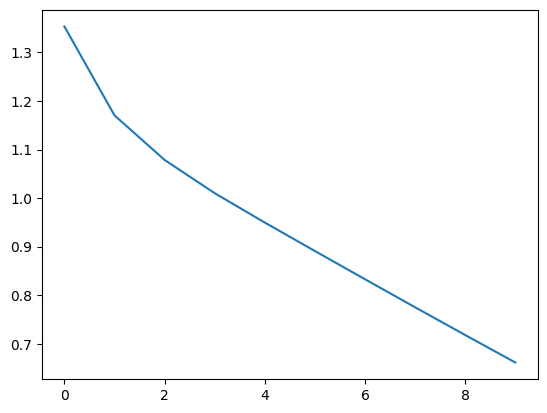

In [11]:
# Stretch 1: Second training step to show loss decreasing
import matplotlib.pyplot as plt

torch.manual_seed(42)
simplenet2 = SimpleNet()
optimizer = torch.optim.SGD(simplenet2.parameters(), lr=0.1)  

# reuse x_train (input)
# and y_train (targets)
# and loss_fn

def train_iteration(epochs: int):
    loss_array = []
    for epoch in range(epochs):  # loop over the dataset multiple times
        optimizer.zero_grad()                # Clear old gradients
        predictions = simplenet2(x_train)    # training pass
        loss = loss_fn(predictions, y_train) # determine loss
        loss.backward()                      # Compute new gradients (backpropagation)
        optimizer.step()                     # Update weights using gradients
        loss_array.append(loss.item())
        print(f"Iteration {epoch+1} loss = {loss.item()}")

    return loss_array

losses = train_iteration(10)
plt.plot(range(len(losses)), losses)

ReLU run
Iteration 5 loss = 1.124350905418396
Iteration 10 loss = 0.7082889676094055
Iteration 15 loss = 0.34107667207717896
Iteration 20 loss = 0.1632833331823349
Iteration 25 loss = 0.08837048709392548
Iteration 30 loss = 0.04877619445323944
Iteration 35 loss = 0.029974468052387238
Iteration 40 loss = 0.01912756636738777
Tanh run
Iteration 5 loss = 0.6638896465301514
Iteration 10 loss = 0.30842748284339905
Iteration 15 loss = 0.16711077094078064
Iteration 20 loss = 0.0972013995051384
Iteration 25 loss = 0.06032292917370796
Iteration 30 loss = 0.039705194532871246
Iteration 35 loss = 0.027397233992815018
Iteration 40 loss = 0.01953790709376335


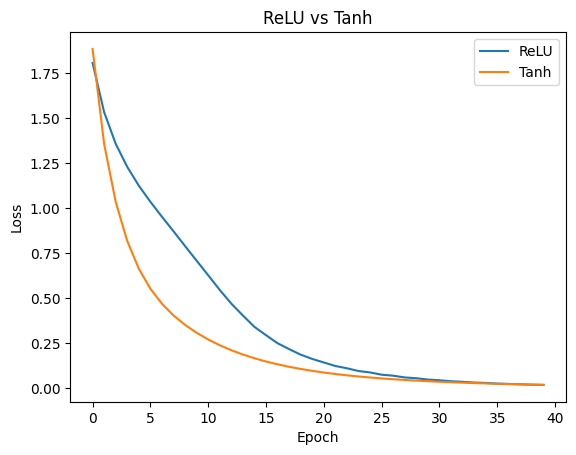

In [16]:
# Stretch 2: Use Tanh activation and compare loss curve to ReLU

class TanhNet(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 6 → 8
        # Why use activation? Without activations, stacking linear layers is pointless (they collapse into a single linear layer). 
        # ReLU adds non-linearity, letting the network learn complex patterns.
        self.act = nn.Tanh()                          # activation function
        self.fc2 = nn.Linear(hidden_dim, output_dim) # 8 → 1

    def forward(self, x):
        x = self.fc1(x)   # Linear: (batch, 6) → (batch, 8). Weighted sum + bias
        x = self.act(x)   # Tanh: squashes values to range (-1, 1). Tanh(x) = (e^x - e^-x)
        x = self.fc2(x)   # Linear: (batch, 8) → (batch, 1). Weighted sum + bias
        return x

# reuse x_train (input)
# and y_train (targets)
# and loss_fn

def train_with_model(model, optimizer, epochs: int):
    loss_array = []
    for epoch in range(epochs):              # loop over the dataset multiple times
        optimizer.zero_grad()                # Clear old gradients
        predictions = model(x_train)         # training pass
        loss = loss_fn(predictions, y_train) # determine loss
        loss.backward()                      # Compute new gradients (backpropagation)
        optimizer.step()                     # Update weights using gradients
        loss_array.append(loss.item())
        if (epoch + 1) % 5 == 0:
            print(f"Iteration {epoch+1} loss = {loss.item()}")
    return loss_array

print("ReLU run")
torch.manual_seed(99)
relu_net = SimpleNet()
relu_optimizer = torch.optim.SGD(relu_net.parameters(), lr=0.1) 
relu_losses = train_with_model(relu_net, relu_optimizer, 40)

print("Tanh run")
torch.manual_seed(99)
tanh_net = TanhNet()
tanh_optimizer = torch.optim.SGD(tanh_net.parameters(), lr=0.1) 
tanh_losses = train_with_model(tanh_net, tanh_optimizer, 40)

plt.plot(range(len(relu_losses)), relu_losses, label='ReLU')
plt.plot(range(len(tanh_losses)), tanh_losses, label='Tanh')
plt.legend()  # Shows the labels
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU vs Tanh')
plt.show()

# There's no universally "best" activation function — it depends on the problem:
# - ReLU is often preferred in deep networks (faster, avoids vanishing gradients)
# - Tanh can be better for problems where outputs are centered around zero
# - This is a simple 2-layer network with synthetic data — real-world results may differ